In [1]:
using DelimitedFiles, FileIO
using GLMakie
using JLD2

In [2]:
m = readdlm("Varna_topo_smooth.txt")

42×119 Matrix{Float64}:
  0.0      0.0      0.0      0.0      0.0     …    0.0      0.0      0.0
  0.0      0.0      0.0      0.0      0.0          0.0      0.0      0.0
  0.0      0.0      0.0      0.0      0.0          0.0      0.0      0.0
  0.0      0.0      0.0      0.0     -2.0501       0.0      0.0      0.0
  0.0      0.0      0.0      0.0     -3.5769       0.0      0.0      0.0
  0.0      0.0      0.0     -1.8305  -5.2644  …    0.0      0.0      0.0
  0.0      0.0      0.0     -2.8172  -6.7789       0.0      0.0      0.0
 -1.2159  -1.0417   0.0     -3.714   -7.8975       0.0      0.0      0.0
 -2.292   -2.2475  -1.5998  -4.5184  -8.5404       0.0      0.0      0.0
 -3.31    -3.8367  -3.1369  -5.401   -8.6442       0.0      0.0      0.0
 -3.8733  -5.3529  -5.0998  -6.2637  -8.0358  …    0.0      0.0      0.0
 -4.028   -6.3502  -6.685   -6.5399  -6.5833       0.0      0.0      0.0
 -4.0306  -6.602   -7.0516  -5.7383  -4.595        0.0      0.0      0.0
  ⋮                        

In [4]:
m[findall(m.<=-1000)] .= 0

1785-element view(::Matrix{Float64}, CartesianIndex{2}[CartesianIndex(1, 1), CartesianIndex(2, 1), CartesianIndex(3, 1), CartesianIndex(4, 1), CartesianIndex(5, 1), CartesianIndex(6, 1), CartesianIndex(7, 1), CartesianIndex(8, 1), CartesianIndex(9, 1), CartesianIndex(10, 1)  …  CartesianIndex(45, 43), CartesianIndex(46, 43), CartesianIndex(47, 43), CartesianIndex(48, 43), CartesianIndex(49, 43), CartesianIndex(50, 43), CartesianIndex(51, 43), CartesianIndex(52, 43), CartesianIndex(53, 43), CartesianIndex(54, 43)]) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

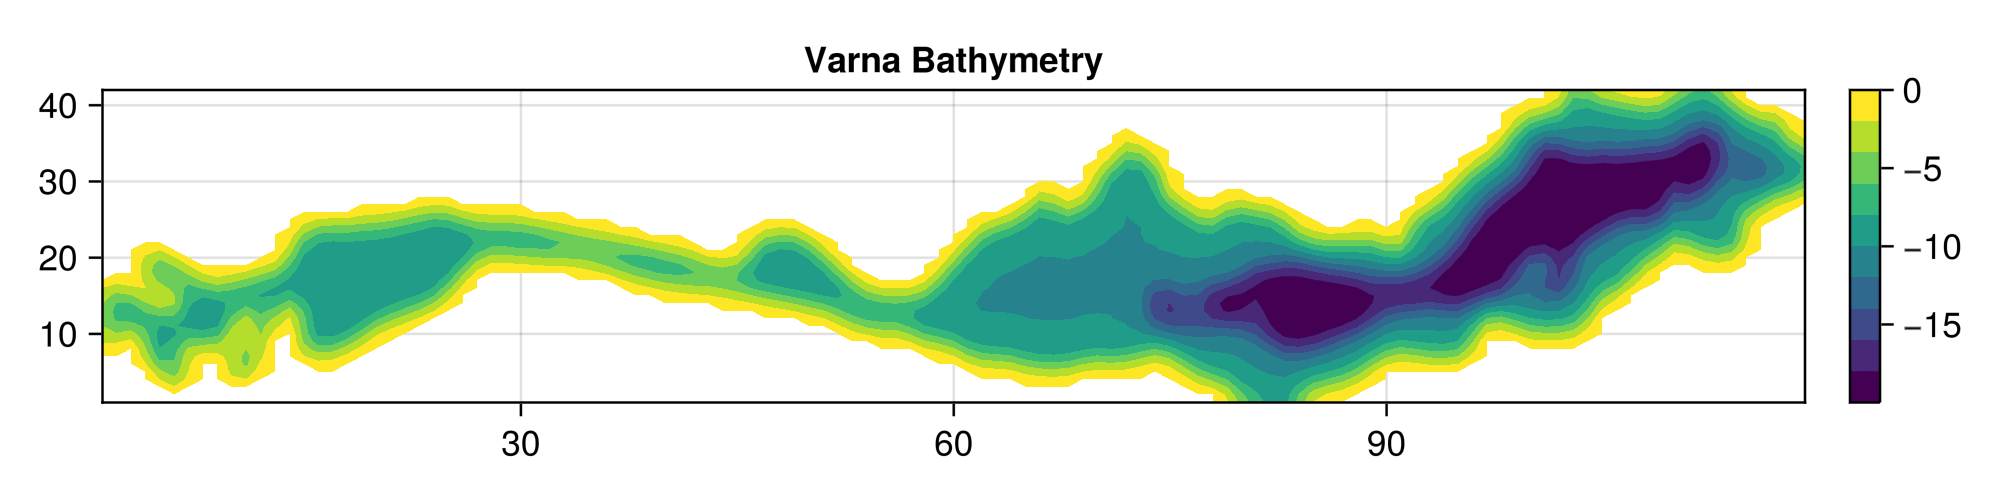

In [17]:
fig = Figure(size = (800, 200))
# Add a contour plot to the figure
ax = Axis(fig[1, 1], title = "Bathymetry")
cf = contourf!(ax, rotr90(m, 1)[:, end:-1:1])
                # levels = range(-200, 0, length = 20),
                # extendhigh = :magenta)


Colorbar(fig[1, 2], cf)

# Customize the plot
ax.title = "Varna Bathymetry"

# Display the figure
fig

In [18]:
@save "Varna_topo.jld2" "depth" = rotr90(m, 1)[:, end:-1:1]

In [45]:
?@save

```
@save filename var1 [var2 ...]
@save filename {compress=true} var1 name2=var2
```

Write one or more variables `var1,...` from the current scope to a JLD2 file `filename`.

For interactive use you can save all variables in the current module's global scope using `@save filename`. More permanent code should prefer the explicit form to avoid saving unwanted variables.

# Example

To save the string `hello` and array `xs` to the JLD2 file example.jld2:

```
hello = "world"
xs = [1,2,3]
@save "example.jld2" hello xs
```

For passing options to the saving command use {}

```
@save "example.jld2" {compress=true} hello xs
```

For saving variables under a different name use regular assignment syntax

```
@save "example.jld2" greeting=hello xarray = xs
```
